In [ ]:
# Importing the Keras main module forcing tensorflow 1.x backend
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

print("Using tensorflow version " + str(tf.__version__))
print("Using keras version " + str(keras.__version__))

Using tensorflow version 2.18.0
Using keras version 3.8.0


# Programming Assignment: MNIST Digit Classification with Keras

**Objective:**

The objective of the assignment is to preprocess a dataset, then create and train a Neural Network to predict the correct label for said dataset. After completing this assignment, you should be familiar with the following:

* How to load a Keras dataset?

* How to one-hot encode the labels?

* How to reshape the dataset?

* How to normalize the dataset for better results?

* How to create and train a Neural Network?

* How to evaluate the results of the NN?

The dataset used is a MNIST dataset that we will load during the assignment. The MNIST dataset is a dataset composed of 60,000 28x28 grayscale training images of the 10 handwritten digits, along with a test set of 10,000 images.

**Deliverables:**

*   This colab notebook with python codes

Total Marks: 30
---


##**Q1. Loading the dataset**
* Load the MNIST dataset (Hint: see https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data)
* Separate the training data and labels, as well as test data and labels.

In [ ]:
x_train, y_train, x_test, y_test = None, None, None, None

# START CODE HERE
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# END CODE HERE

When you run this code, you should get the expected output as shown below:


In [ ]:
print("Length of training set: ", len(x_train))
print("Length of testing set: ", len(x_test))

Length of training set:  60000
Length of testing set:  10000


Expected output :

```
Length of training set:  60000
Length of testing set:  10000
```




And if you run this cell, the number shown should be a $5$.

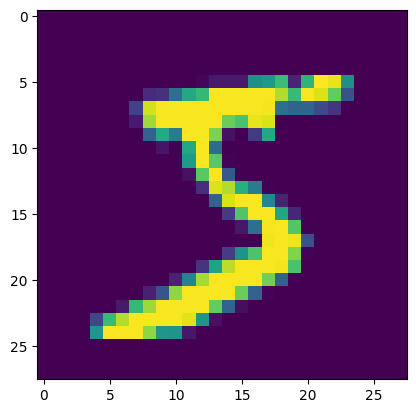

In [ ]:
plt.imshow(x_train[0])
plt.show()

## **Q2. One-hot encoding of the dataset**
The database contains images of handwritten digits. Hence, they belong to one of 10 categories, 0 to 9, depending on the digit they represent.
However, to be able to exploit more easily the dataset, we want the true labels to be computed in the same format. Thus, we will do **one-hot encoding**. It means that if for example, an image represents the digit $7
$, then the one-hot encoded label will be :

$$ \mathbf{y} = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] $$

Here, you need to turn train and test labels to one-hot encoding.

In [ ]:
#START CODE HERE
y_encoded_train = to_categorical(y_train, 10)
y_encoded_test = to_categorical(y_test, 10)
#END CODE HERE

When you run this code, you should get the expected output as shown below:


In [ ]:
y_encoded_train = y_train
y_encoded_test = y_test

print("{} becomes {}".format(y_train[3],y_encoded_train[3]))
print("{} becomes {}".format(y_test[45],y_encoded_test[45]))

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] becomes [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] becomes [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Expected output :

```
1 becomes [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
5 becomes [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
```



## **Q3. Reshape the data**

The images are black and white of size $28 \times 28$. We want to work with simple classification model, so we need to transform the array of the images from size $(28 \times 28)$ to $(784)$.
You should then transform the images to the size $(784)$ in the function `reshape_x`. You can use the numpy function ```np.reshape``` in your own function.

In [ ]:
def reshape_x(x):

  # START CODE HERE
    x_reshape = x.reshape(x.shape[0], -1)
    return x_reshape

x_train_reshape = reshape_x(x_train)
x_test_reshape = reshape_x(x_test)



  # END CODE HERE

  return x_reshape


When you run this code, you should get the expected output as shown below:


In [ ]:
x_train_reshape = reshape_x(x_train)
x_test_reshape = reshape_x(x_test)

print("Length of new training set images: ", len(x_train_reshape[0]))
print("Length of new testing set images: ", len(x_test_reshape[0]))

Length of new training set images:  784
Length of new testing set images:  784


Expected output :

```
Length of new training set images:  784
Length of new testing set images:  784

```



##**Q4. Feature Scaling**

In the lab, we have seen standardization, where data is scaled to have a mean of 0 and a standard deviation of 1. In this task, we will explore another feature scaling technique — min-max scaling, which rescales the pixel values to be between 0 and 1. You will use the `MinMaxScaler` from the `sklearn.preprocessing` module to achieve this.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# START CODE HERE

# END CODE HERE

When you run this code, you should get the expected output as shown below:

In [ ]:
print(x_train_norm[1][131], x_train_norm[1][129])

0.19607843137254902 0.9921568627450981


Expected output :

```
0.19607843137254902 0.9921568627450981

```



##**Q5. Create a simple Neural Network with Keras**

In this question, you are required to build a simple Neural Network using the Sequential model in Keras with the following configuration:
*	Input Layer: Not explicitly defined, but specified using input_dim=input_shape in the first Dense layer.
*	Hidden Layer: A single hidden layer with input_shape neurons and sigmoid activation function.
*	Output Layer: A final layer with softmax activation, which is suitable for multi-class classification tasks.


In [ ]:
# START CODE HERE
# Create a Sequential model
model = Sequential()

# Add a hidden layer with 300 neurons and sigmoid activation
model.add(Dense(300, input_dim=784))
model.add(Activation('sigmoid'))

# Add an output layer with 10 neurons (one for each class) and softmax activation
model.add(Dense(10))
model.add(Activation('softmax'))

# END CODE HERE

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


When you run this code, you should get the expected output as shown below:

In [ ]:
model.summary()

Expected output :

```
Model: "sequential"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           3,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘
 Total params: 238,510 (931.68 KB)
 Trainable params: 238,510 (931.68 KB)
 Non-trainable params: 0 (0.00 B)
```



##**Q6. Training the network**

We chose a SGD optimizer with learning rate $0.01$, and then compiled the model.

Now, you can train the model on 10 epochs. Don't forget to store your values for training loss/accuracy and test lost/accuracy in some way!

In [ ]:
opt = tf.optimizers.SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# START CODE HERE
# Compile model
opt = tf.optimizers.SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Train model
history = model.fit(x_train_norm, y_encoded_train, epochs=10, batch_size=32, validation_data=(x_test_norm, y_encoded_test))


# END CODE HERE

##**Q7. Plot loss and accuracy functions**

Now that you have stored the loss and accuracy for both the training set and the validation set, you can plot them. Please make two plots :
* One with loss for training and validation set
* One with accuracy for training and validation set

Hint: When you train a model using Keras, the fit() function returns a `history` object. This object stores the values of loss and accuracy for both training and validation across epochs.


In [ ]:
# History for loss

# START CODE HERE
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# END CODE HERE

plt.show()
print('\n')

# History for accuracy

# START CODE HERE
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
# END CODE HERE

plt.show()


##**Q8. Check the predictions of your model**

This question is only to see what your model predicts, and if this is correct. No need to implement here, just run the cell and check your results!

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
According to your model, the handwritten number shown is 7.


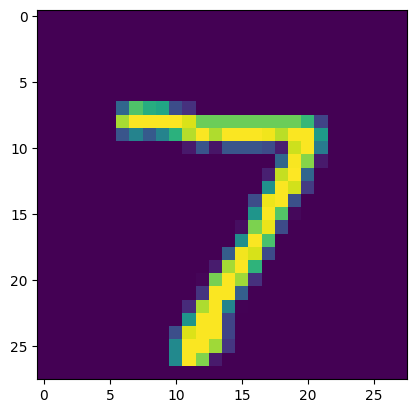

In [ ]:
plt.imshow(x_test[0])
print("According to your model, the handwritten number shown is {}.".format(np.argmax(model.predict(x_test_reshape)[0])))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
According to your model, the handwritten number shown is 6.


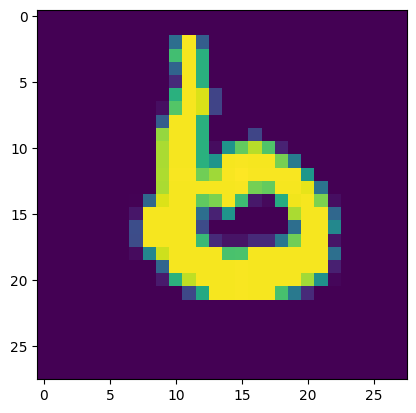

In [ ]:
plt.imshow(x_test[587])
print("According to your model, the handwritten number shown is {}.".format(np.argmax(model.predict(x_test_reshape)[587])))



---


# End of your Assignment